# Predicting wine quality using a decision tree

### Regression trees: 
Use rules to group data into target variable ranges for example Wine Quality

Also split the data on feature values 

Minimize cost (impurity). Usually the mean squared error 

### Importing  the data

In [1]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')
w_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Split the dataset into train and test samples
Use 30% data for the test sample size

In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]

#Use all data for cross validation
x_data = w_df.iloc[0:,0:11]
y_data = w_df[['quality']]
#x_data
y_test

,quality
411,5
860,5
1325,6
1086,7
774,6
767,5
1485,5
82,5
180,5
735,5


#### Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
For wine quality, a regressor is needed

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#use the Decision Tree Regressor for model
model = DecisionTreeRegressor(max_depth = 3)

#fit the data to the model
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
#Getting the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.3338786664139374
Testing R-Square 0.31922010113867694


### For viewing the tree
This is to a depth of 3

If we assume that all good wines must be equal to or above the quality value of 7 then we do not find any good wine at this depth.

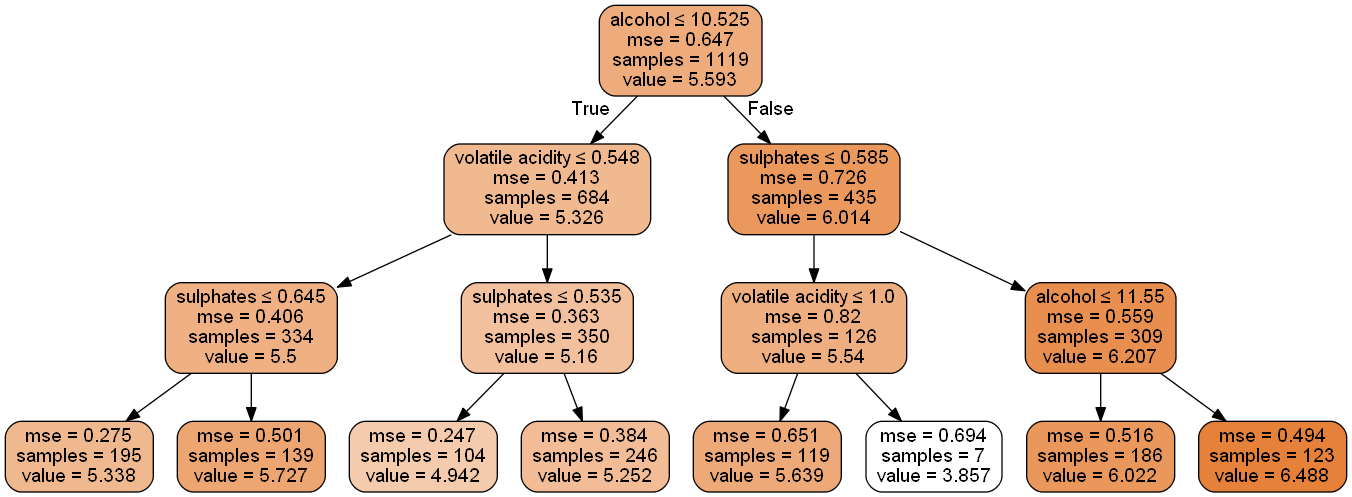

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine.png')
Image(graph.create_png())

### Below we try with max depth of 4 and look for any samples with quality >= 7

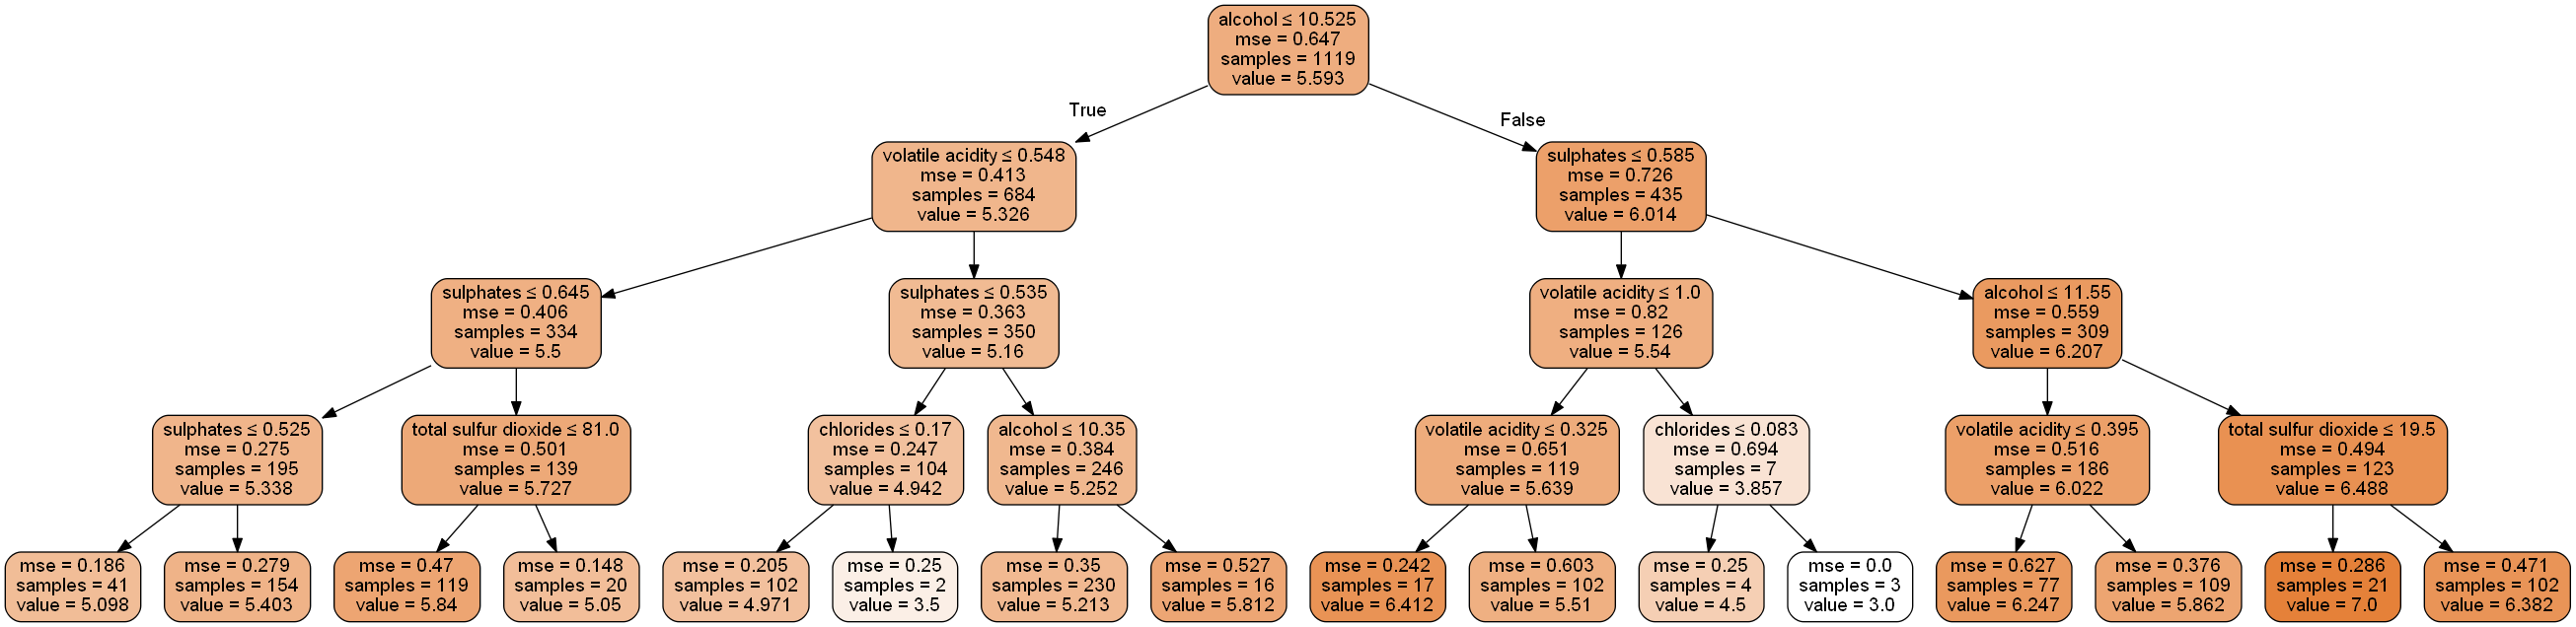

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#use the Decision Tree Regressor for model
model = DecisionTreeRegressor(max_depth = 4)

#fit the data to the model
model.fit(x_train,y_train)

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wine.png')
Image(graph.create_png())


# We did find one leaf on the right with 21 samples and quality = 7. 

Those are the wines we were looking for